In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from Data.Featurisation import data_handeler
import numpy as np
import scienceplots
plt.rcdefaults()
plt.style.use(['science'])
avg_rmse = pd.read_pickle("evaluation/Target/avg_rmse.pkl")
avg_times = pd.read_pickle("evaluation/Target/avg_times.pkl")

rmse = pd.read_pickle("evaluation/Target/rmse.pkl")
time = pd.read_pickle("evaluation/Target/times.pkl")
time = time.loc[:,(slice(None), 'Training Time')]
sites = range(9)
models = [0,1,5,6,2,3,4,8,9]
model_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]
import itertools
 
print(time)

one                0             1             2             3             4   \
two     Training Time Training Time Training Time Training Time Training Time   
one two                                                                         
0   0        1.648701       0.73853      6.809503       1.35395      2.395542   
    1        1.221879      1.243125      13.61837        3.3368      3.655778   
    2        1.747467      1.776594     20.415895      4.123009      5.272843   
    3        2.355875      2.380261     27.263735      5.481949       6.65952   
    4        2.879558      2.918782     34.036311      7.463693      7.891002   
...               ...           ...           ...           ...           ...   
8   8        5.176881      5.196375     60.425834     12.400702     14.579152   
    9         5.79407      5.796431     67.088655     13.777178      15.97326   
    10       6.315624      6.323772     73.863698     15.540689     17.208129   
    11       6.919682      6

## Zero-shot accuracy

In [10]:
zero_shot_rmse = rmse.loc[(slice(None), 0), :]
zero_shot_rmse = zero_shot_rmse.droplevel(1)
zero_shot_rmse.astype(float).round(2).transpose()

one,0,1,2,3,4,5,6,7,8
0,235.21,191.59,547.38,255.31,205.65,204.24,189.76,201.27,216.30
1,233.59,223.28,555.26,228.77,210.73,177.27,191.51,199.91,220.95
2,331.84,267.04,557.76,264.64,295.44,264.60,276.70,297.43,266.85
3,1064.40,924.65,1247.88,576.13,984.86,868.63,799.30,829.86,773.80
4,1051.19,894.70,1256.60,573.19,959.78,849.97,792.01,794.05,765.13
5,282.33,261.25,558.06,268.33,241.91,220.39,221.08,185.69,230.50
6,277.50,255.06,573.50,284.36,237.71,221.73,221.37,193.64,229.07
7,229.07,229.07,229.07,229.07,229.07,229.07,229.07,229.07,229.07
8,313.58,251.49,963.08,308.56,284.46,236.12,272.39,220.06,327.69
9,379.31,348.88,688.91,287.18,367.84,304.17,336.00,367.22,322.88


In [11]:
(1-zero_shot_rmse.div(zero_shot_rmse[9], axis=0)).astype(float).round(4).transpose()

one,0,1,2,3,4,5,6,7,8
0,0.3799,0.4508,0.2054,0.1110,0.4409,0.3285,0.4352,0.4519,0.3301
1,0.3842,0.3600,0.1940,0.2034,0.4271,0.4172,0.4300,0.4556,0.3157
2,0.1252,0.2346,0.1904,0.0785,0.1968,0.1301,0.1765,0.1901,0.1735
3,-1.8061,-1.6504,-0.8114,-1.0062,-1.6774,-1.8558,-1.3789,-1.2598,-1.3965
4,-1.7713,-1.5645,-0.8240,-0.9959,-1.6092,-1.7944,-1.3572,-1.1623,-1.3697
5,0.2557,0.2512,0.1899,0.0656,0.3424,0.2754,0.3420,0.4943,0.2861
6,0.2684,0.2689,0.1675,0.0098,0.3538,0.2710,0.3412,0.4727,0.2906
7,0.3961,0.3434,0.6675,0.2024,0.3773,0.2469,0.3183,0.3762,0.2906
8,0.1733,0.2792,-0.3980,-0.0744,0.2267,0.2237,0.1893,0.4007,-0.0149
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## RMSE target

In [12]:
#AVG RMSE
avg_rmse = pd.DataFrame(index=models, columns=sites)
for site in sites:
    _,_, eval_data = data_handeler(site, "nwp", "nwp", "nwp", transform=True)
    for model in models:  
        with open(f"DA_forecasts/DA_{model}_{site}", 'rb') as f:
            DA_forecast = pickle.load(f)
        
        power = eval_data['P']
        # if model in [3,4]:
        DA_forecast = DA_forecast[31*24:] #(30 days + 1 lag day)*24
        power = power[31*24:] 
        avg_rmse.loc[model, site] = np.sqrt(np.mean(np.square(DA_forecast-power)))
        
     

Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating
c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


In [13]:
print(avg_rmse.astype(float).round(2))

        0       1       2       3       4       5       6       7       8
0  208.57  170.36  536.54  147.25  160.18  173.03  169.22  150.74  160.51
1  210.53  173.58  552.86  155.67  161.98  175.55  169.80  151.15  165.21
5  210.06  170.29  539.18  144.24  165.25  178.03  170.25  152.18  164.67
6  209.55  170.81  540.33  149.83  166.23  175.59  170.50  151.81  165.49
2  306.39  251.91  601.96  197.49  248.50  266.28  247.69  195.71  233.99
3  239.55  195.75  555.42  144.29  188.07  189.31  189.78  172.78  186.61
4  222.27  190.87  543.64  147.09  182.30  186.36  179.84  182.93  171.79
8  276.55  214.24  881.43  235.61  200.36  212.71  233.16  185.69  241.20
9  377.17  311.98  764.28  243.39  312.33  327.01  300.52  242.13  285.50


In [14]:
print((1-avg_rmse/avg_rmse.loc[9]).astype(float).round(4))

        0       1       2       3       4       5       6       7       8
0  0.4470  0.4539  0.2980  0.3950  0.4871  0.4709  0.4369  0.3774  0.4378
1  0.4418  0.4436  0.2766  0.3604  0.4814  0.4632  0.4350  0.3757  0.4213
5  0.4431  0.4542  0.2945  0.4074  0.4709  0.4556  0.4335  0.3715  0.4232
6  0.4444  0.4525  0.2930  0.3844  0.4678  0.4630  0.4327  0.3730  0.4203
2  0.1876  0.1925  0.2124  0.1886  0.2044  0.1857  0.1758  0.1917  0.1804
3  0.3649  0.3726  0.2733  0.4072  0.3979  0.4211  0.3685  0.2864  0.3464
4  0.4107  0.3882  0.2887  0.3957  0.4163  0.4301  0.4016  0.2445  0.3983
8  0.2668  0.3133 -0.1533  0.0320  0.3585  0.3495  0.2241  0.2331  0.1551
9  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000


C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3165989636.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3165989636.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3165989636.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3165989636.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


IndexError: list index out of range

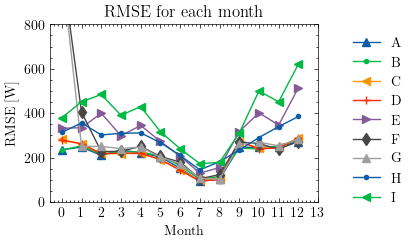

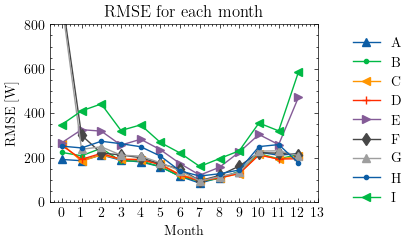

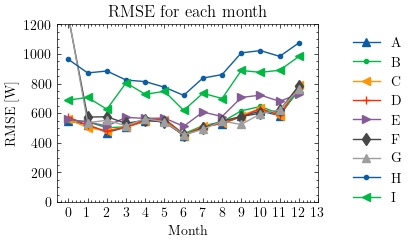

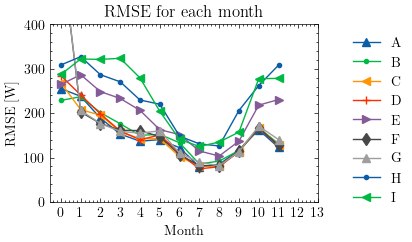

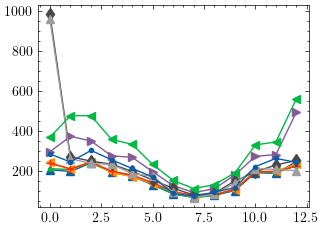

In [15]:
ymax = [800, 800, 1200, 400]

for j, site in enumerate(sites):
    #RMSE
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if i <= 6:
            fmt = "^-"
        else:
            fmt=""
        plt.plot(rmse.loc[(site, slice(None)), model].values, marker=next(marker), linestyle="-", label = model_labels[i])
    plt.ylim([0, ymax[j]])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.title("RMSE for each month")
    plt.xlabel("Month")
    plt.ylabel("RMSE [W]")
    plt.xticks(range(len(rmse.loc[site].index)+1), labels=range(len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/rmse_month_s{site}")
    fig.show()

## Time Target

C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\2213294375.py:17: Us

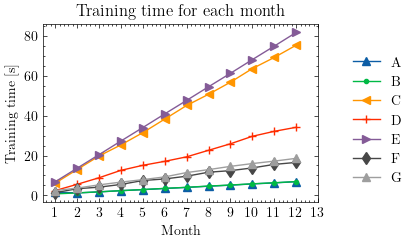

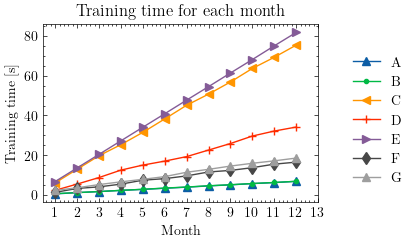

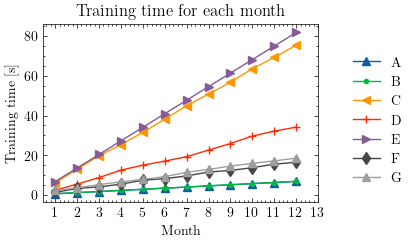

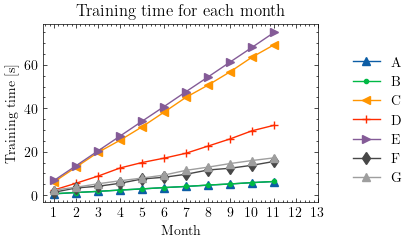

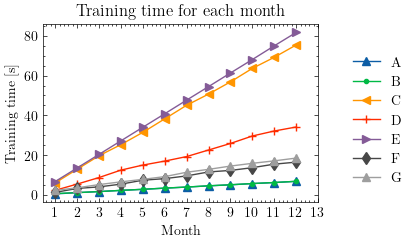

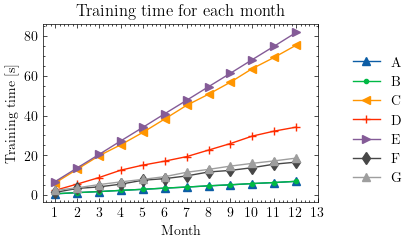

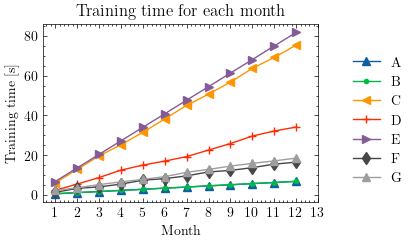

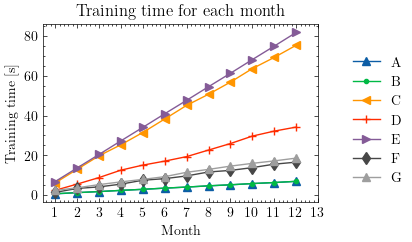

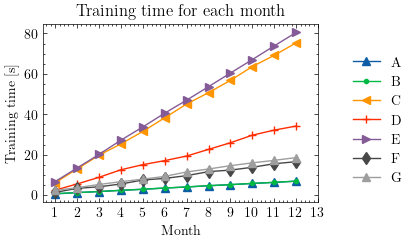

In [16]:
# ymax = [800, 800, 1200, 400]
for j, site in enumerate(sites):
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    #RMSE
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if i <=6: 
            plt.plot(time.loc[(site, slice(None)), model].values, marker=next(marker), linestyle="-", label = model_labels[i])
    # plt.ylim([0, ymax[j]])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel("Month")
    plt.ylabel("Training time [s]")
    plt.title("Training time for each month")
    plt.xticks(range(len(rmse.loc[site].index)), labels=range(1,len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/time_month_{site}")
    fig.show()

In [17]:
training = avg_times.loc[:, (slice(None), 'Training Time')].droplevel(1, axis=1).transpose()
training.astype(float).round(2)

,0,1,2,3,4,5,6,7,8
one,,,,,,,,,
0,3.83,3.75,3.77,3.49,3.78,3.78,3.78,3.78,3.78
1,3.80,3.80,3.80,3.51,3.80,3.80,3.80,3.80,3.80
2,44.27,44.27,44.27,40.85,44.24,44.25,44.26,44.27,43.69
3,9.13,9.13,9.13,8.46,9.14,9.14,9.15,9.15,9.14
4,10.49,10.49,10.49,9.75,10.49,10.49,10.49,10.49,10.49
5,41.23,41.22,41.18,38.11,41.22,41.21,41.20,41.22,41.23
6,18.78,18.77,18.77,17.38,18.78,18.77,18.78,18.78,18.79
7,18.79,18.79,18.79,18.79,18.79,18.79,18.79,18.79,18.79
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Skill score target

C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3462015850.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_21208\3462015850.py:26: Us

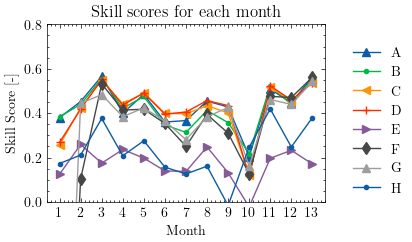

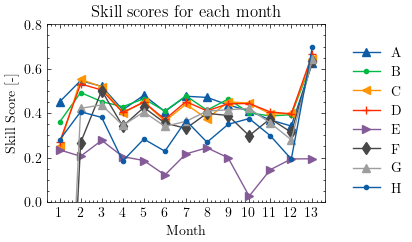

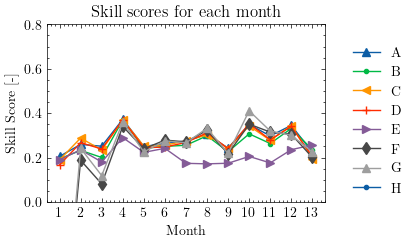

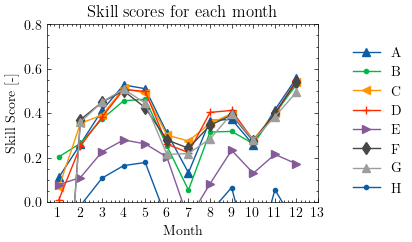

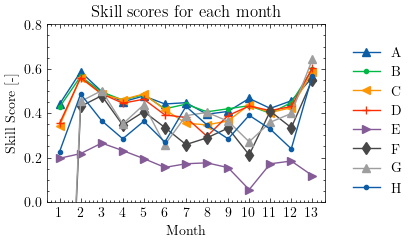

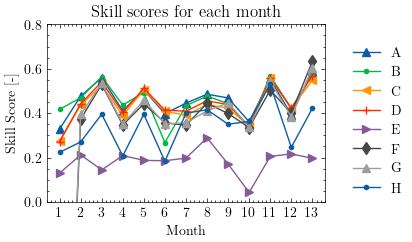

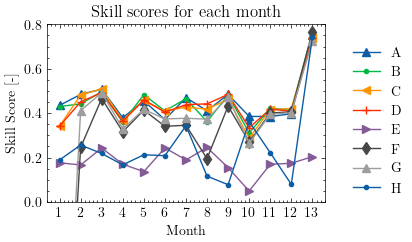

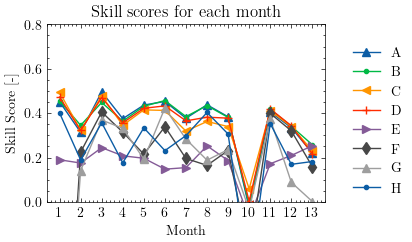

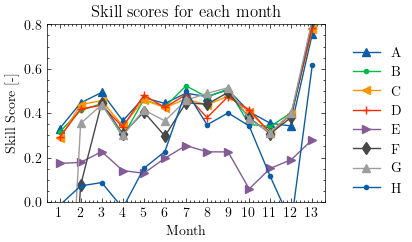

In [18]:
avg_skill_scores = pd.DataFrame(index=sites, columns=models)
for j, site in enumerate(sites):
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    persist = rmse.loc[(site, slice(None)), 9].values
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if model != 9:
            rmse_mod_site = rmse.loc[(site, slice(None)), model].values
            ss = 1-  rmse_mod_site/persist
            if model in [3,4]:
                ss_avg = ss[1:]
            else:
                ss_avg = ss
            
            avg_skill_scores.loc[site, model] = np.nanmean(ss)

            plt.plot(ss, marker=next(marker), linestyle="-", label = model_labels[i])
    plt.ylim([0, 0.8])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel("Month")
    plt.ylabel("Skill Score [-]")
    plt.title("Skill scores for each month")
    plt.xticks(range(len(rmse.loc[site].index)), labels=range(1,len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/ss_month_{site}")
    fig.show()

## nRMSE Source

In [75]:
#nRMSE
metrics =  pd.read_pickle("evaluation/source/metrics.pkl")
rmse_source = metrics.loc[:, (slice(None), "rmse")]
print(rmse_source)

lags = 24
forecast_period = 24
train_test_split = 0.8
source_models = [0,1,2,5,6]
for i in source_models:
    for j in range(4):
        rmse = rmse_source.loc[i,j].values
        if i <=4:
            data_name = "nwp"
        else: 
            data_name = "era5"
        if i in [1,6]:
            phys = True
        else:
            phys = False
        source_data,_, _ = data_handeler(j, data_name, "nwp", "nwp", phys)
        length = len(source_data.index)

        prediction_len = length - lags  # See how much data is used for predictions

        # The number of windows we have to predict depends on the length of the forecast window 
        # (we assume that the forecaster wants to forecast every upcoming period)
        windows = int(prediction_len / forecast_period)  # Get the number of predictions we can make.
        train_len = round(windows * train_test_split)  # Split the features into a train set...
        test_len = windows - train_len  # ... and a test set
        test = source_data.iloc[train_len*forecast_period+lags:]
        test_power = test['P']
        denominator = (test_power**2).mean()
        print(denominator)
        nRMSE = rmse/denominator


one           0           1           2           3    4
two        rmse        rmse        rmse        rmse rmse
0    214.510798  163.818526  260.551767  170.368425  NaN
1     224.40215  164.172116  267.011164  168.338852  NaN
2    337.942533  239.791864  286.400358  231.885139  NaN
3      0.006426         NaN    0.001757    0.007765  NaN
4      0.005625         NaN     0.11291    0.005019  NaN
5    236.459202  173.079215  222.505591  177.363527  NaN
6    233.906099  168.338706  212.568593  172.529857  NaN
7       0.00589         NaN    0.110027    0.004545  NaN
8      0.005885         NaN    0.110027    0.004646  NaN
9           NaN         NaN         NaN         NaN  NaN
10          NaN         NaN         NaN         NaN  NaN
11          NaN         NaN         NaN         NaN  NaN
Not in Colab environment: Using .pkl files
435124.5376243452
Not in Colab environment: Using .pkl files
251545.0664993452
Not in Colab environment: Using .pkl files
2837036.9540125867
Not in Colab envir

c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


432877.98395425593
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


250906.60622348217
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


2837036.9540125867
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


195038.26708836306
Not in Colab environment: Using .pkl files
435124.5376243452
Not in Colab environment: Using .pkl files
251545.0664993452
Not in Colab environment: Using .pkl files
2837036.9540125867
Not in Colab environment: Using .pkl files
195038.26708836306
Not in Colab environment: Using .pkl files
408529.4456505995
Not in Colab environment: Using .pkl files
238163.1399658873
Not in Colab environment: Using .pkl files
2836269.6840755707
Not in Colab environment: Using .pkl files
195488.55370070922
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


406542.8642336331
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


237930.62764385494
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


2836269.6840755707
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


195488.55370070922
